 Notebook 02 — Analyse univariée

Cette section étudie individuellement les variables du dataset :

- Time  
- Amount  
- Class  
- V1 à V28 (composantes PCA)

Objectifs :
- comprendre les distributions ;
- détecter les valeurs extrêmes ;
- analyser la symétrie ou asymétrie des variables ;
- préparer l’analyse bivariée.

Cette étape suit les bonnes pratiques du Chapitre 11 (Analyse exploratoire).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("creditcard.csv")



**Analyse univariée de la variable Amount**

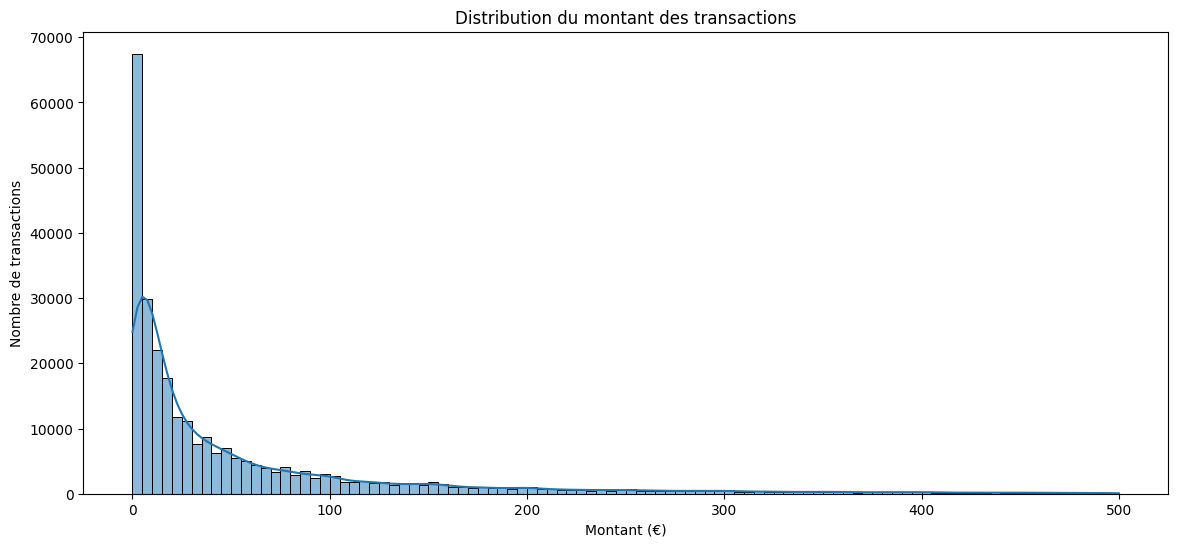

Asymétrie (skewness) : 16.977724453761024
Aplatissement (kurtosis) : 845.0926455465277


In [37]:
plt.figure(figsize=(14,6))
plt.title("Distribution du montant des transactions")
plt.xlabel("Montant (€)")
plt.ylabel("Nombre de transactions")
sns.histplot(df[df['Amount'] < 500]['Amount'], bins=100, kde=True)

plt.show()

print("Asymétrie (skewness) :", df["Amount"].skew())
print("Aplatissement (kurtosis) :", df["Amount"].kurt())


Même en limitant l’analyse aux montants inférieurs à 500 €, la distribution conserve une forme typique de queue lourde.
On observe :

une forte concentration de micro-paiements près de 0 €,

une décroissance continue, proche d’un comportement exponentiel,

une longue queue de valeurs plus élevées, révélant la présence occasionnelle de transactions plus importantes,

une asymétrie marquée (confirmée par la skewness), caractéristique des données financières réelles.

Ce zoom est nécessaire : sur l’histogramme global (0–25 691 €), la forte asymétrie écrase toute la structure informative.
Le graphique détaillé permet donc d’interpréter correctement les comportements de dépense et de mieux comprendre les variations dans les faibles montants.

**Analyse de le variable Time**


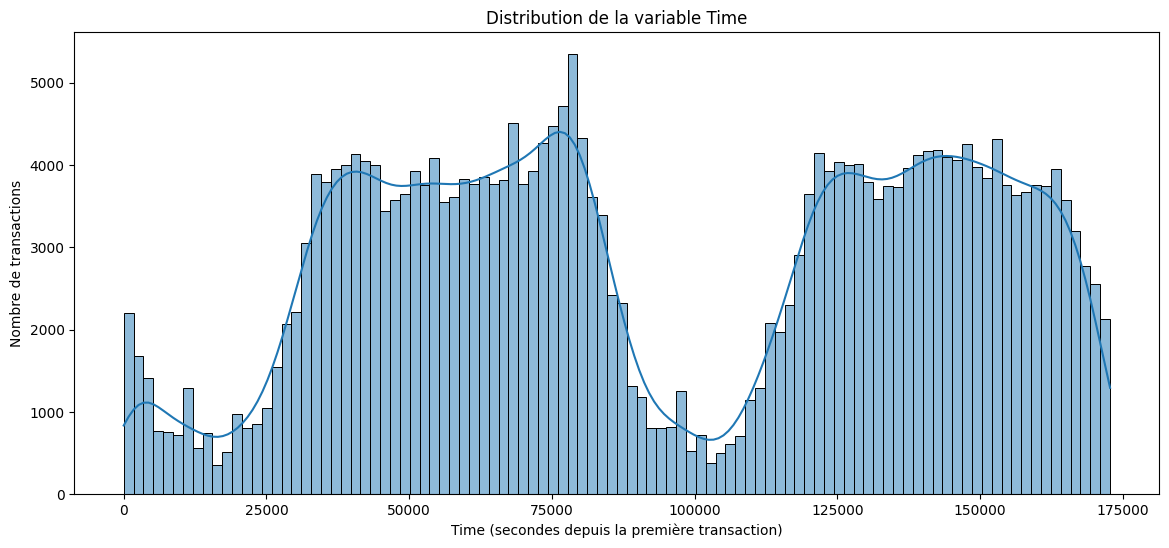

Asymétrie (skewness) : -0.0355676180063216
Aplatissement (kurtosis) : -1.2935300508989838


In [38]:
plt.figure(figsize=(14,6))
sns.histplot(df["Time"], bins=100, kde=True)
plt.title("Distribution de la variable Time")
plt.xlabel("Time (secondes depuis la première transaction)")
plt.ylabel("Nombre de transactions")
plt.show()

print("Asymétrie (skewness) :", df["Time"].skew())
print("Aplatissement (kurtosis) :", df["Time"].kurt())


La variable Time représente le nombre de secondes écoulées depuis la première transaction du dataset.
La distribution n’est pas uniforme et montre des cycles d’activité très marqués, correspondant à environ deux jours (48 heures).

On observe deux grands motifs :

1. Des périodes d’activité élevée

Entre environ 30 000 et 80 000 secondes

Entre 120 000 et 160 000 secondes

Ces pics correspondent probablement aux heures actives de la journée (journées commerciales normales).

2. Des périodes d’activité faible

Entre 0 et 20 000 secondes

Vers 100 000 secondes (nettement moins d’activité)

Ces creux correspondent probablement aux heures nocturnes, où peu de transactions sont réalisées.

La forme ondulée du KDE confirme que les transactions suivent une structure temporelle quotidienne, plutôt qu’un flux constant.

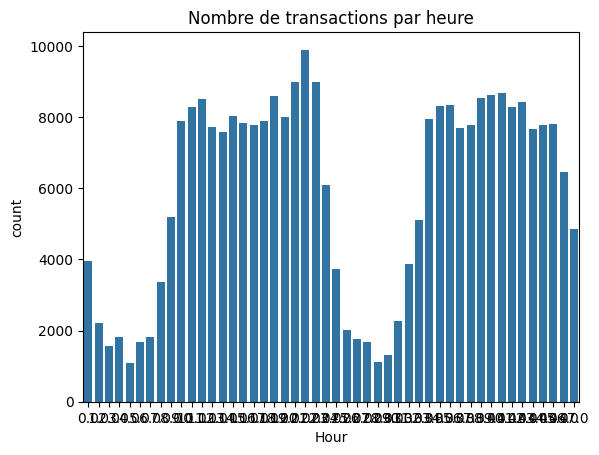

In [39]:
df["Hour"] = df["Time"] // 3600  # conversion en heures
sns.countplot(x="Hour", data=df)
plt.title("Nombre de transactions par heure")
plt.show()


L’analyse temporelle montre que les transactions suivent un cycle de 24 heures, avec une forte activité en journée et une baisse significative durant la nuit.
Cela suggère que le dataset reflète un comportement réel de consommateurs européens et permet d’anticiper des analyses futures sur la fraude.

En particulier, il sera pertinent d’étudier :

si les transactions frauduleuses sont concentrées à certaines heures,

si les fraudes se produisent davantage en dehors des heures habituelles (par exemple tard la nuit).

**Analyse univariée des variables V1–V28**

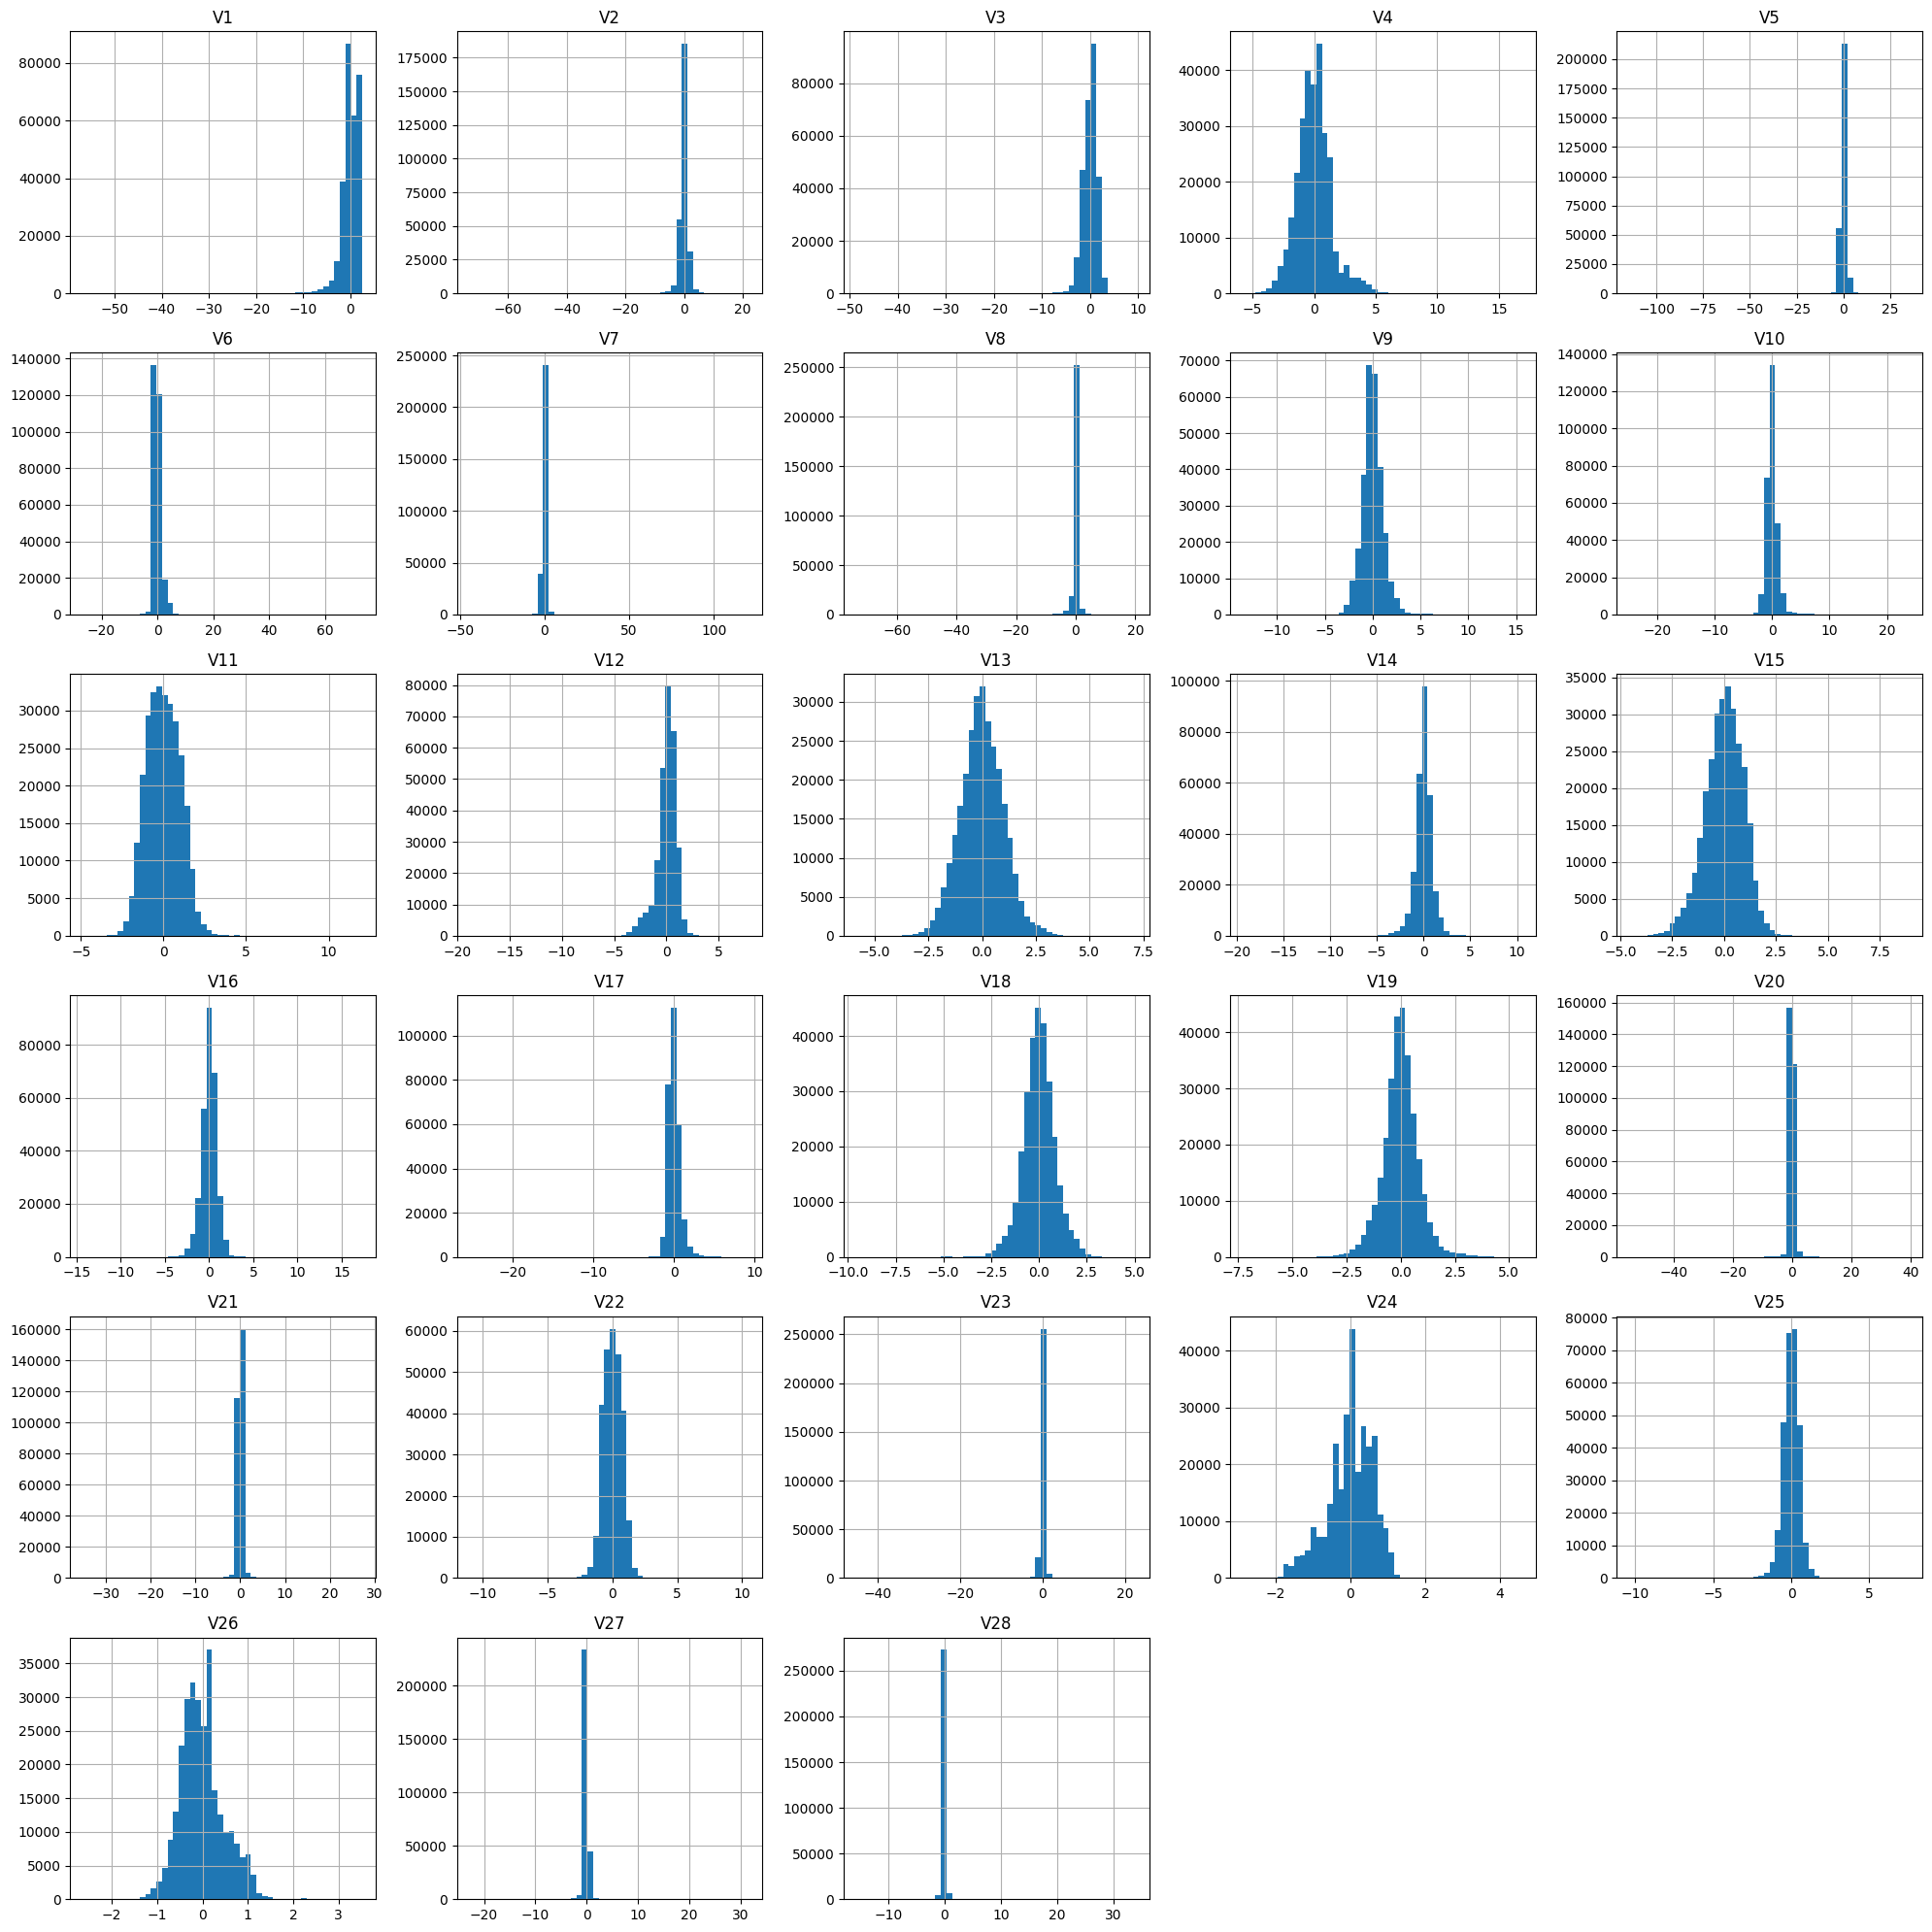

In [40]:
cols = [f"V{i}" for i in range(1,29)]
df[cols].hist(figsize=(20,20), bins=50)
plt.tight_layout()
plt.show()


Les variables V1 à V28 résultent d’une transformation PCA (Principal Component Analysis) appliquée aux variables originales du dataset afin de garantir l’anonymisation.
Cette transformation produit des composantes non interprétables directement, mais leur distribution permet d’observer plusieurs éléments importants :

1. Toutes les variables présentent une distribution centrée autour de 0
Ce comportement est typique du PCA, où les composantes sont normalisées et recentrées.

2. La majorité des variables suivent une distribution proche d’une loi normale
C’est le cas de V2, V3, V4, V10, V11, V12, V13, V14, V17, V18, V19, etc.
Cela indique que l’essentiel de la variance est réparti uniformément dans ces directions projetées.

3. Certaines variables présentent des distributions asymétriques ou aplaties
Notamment :

V1, V7, V20, V23 : fortement asymétriques ou avec des valeurs extrêmes.

V5, V6, V24, V25, V26 : distributions décalées ou étirées.

Ces variables pourraient être plus discriminantes pour la détection de la fraude.